<a href="https://colab.research.google.com/github/pranavmpillai3/DNN_for_Fraud_Transaction_Detection/blob/main/Pet_Emotion_Detection_using_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Attaching the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import os
os.getcwd()

'/content/drive/My Drive/gdrive/Pet_Emotion_Detection'

In [67]:
# # Configuring the environment Variable
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [68]:
# !pip install kaggle

In [69]:
#selecting the particular directory
os.chdir('/content/drive/MyDrive/gdrive/Pet_Emotion_Detection')

In [70]:
# #Downloading the div2k-dataset
# !kaggle datasets download -d anshtanwar/pets-facial-expression-dataset

In [71]:
# zip_path = '/content/drive/MyDrive/gdrive/pets-facial-expression-dataset.zip'

In [72]:
# #selecting the zip file
# !cp {'zip_path'}

In [73]:
# #uniziping
# !unzip -q 'pets-facial-expression-dataset.zip'

In [74]:
os.listdir(os.getcwd())

['Angry', 'Other', 'Sad', 'happy']

In [75]:
data_path = os.getcwd()

In [76]:
data_path

'/content/drive/MyDrive/gdrive/Pet_Emotion_Detection'

In [77]:
import tensorflow as tf

In [78]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [79]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [81]:
data = tf.keras.utils.image_dataset_from_directory(data_path,
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   image_size = (299, 299),
                                                   shuffle = True,
                                                   seed=42)

Found 370 files belonging to 4 classes.


In [82]:
class_names = data.class_names
class_names

['Angry', 'Other', 'Sad', 'happy']

In [83]:
data_iterator = data.as_numpy_iterator()

In [84]:
batch = data_iterator.next()

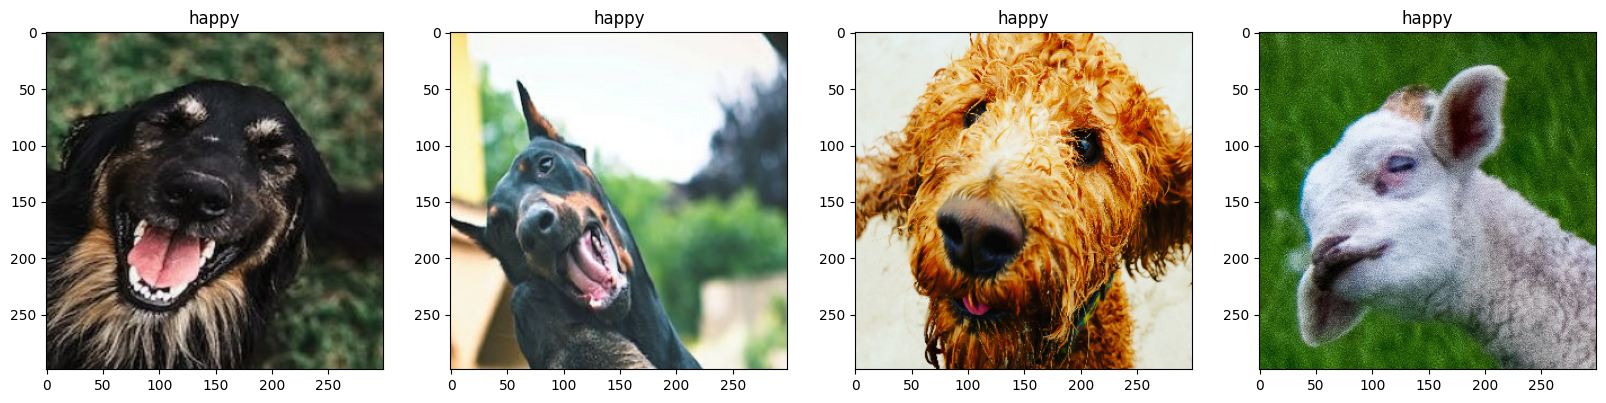

In [85]:
from ast import Str
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text([class_names[i] for i in range(len(batch[1][idx])) if batch[1][idx][i] == 1][0])


In [86]:
data = data.map(lambda x,y: (x/255, y))

In [87]:
data.as_numpy_iterator().next()

(array([[[[6.54901981e-01, 6.90196097e-01, 7.25490212e-01],
          [6.54901981e-01, 6.90196097e-01, 7.25490212e-01],
          [6.74522936e-01, 7.09817052e-01, 7.45111167e-01],
          ...,
          [7.50606433e-02, 8.25496614e-02, 5.20689711e-02],
          [5.09803928e-02, 5.49019612e-02, 2.35294122e-02],
          [5.09803928e-02, 5.49019612e-02, 2.35294122e-02]],
 
         [[6.54901981e-01, 6.90196097e-01, 7.25490212e-01],
          [6.54901981e-01, 6.90196097e-01, 7.25490212e-01],
          [6.74522936e-01, 7.09817052e-01, 7.45111167e-01],
          ...,
          [7.50606433e-02, 8.25496614e-02, 5.20689711e-02],
          [5.09803928e-02, 5.49019612e-02, 2.35294122e-02],
          [5.09803928e-02, 5.49019612e-02, 2.35294122e-02]],
 
         [[6.50941014e-01, 6.86235130e-01, 7.21529245e-01],
          [6.50941014e-01, 6.86235130e-01, 7.21529245e-01],
          [6.71688020e-01, 7.06982136e-01, 7.42276251e-01],
          ...,
          [7.35305920e-02, 8.25496614e-02, 5.1303

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [89]:
train_size

8

In [90]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import InceptionV3

In [92]:
incp = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [93]:
for layer in incp.layers:
    layer.trainable = False


In [94]:
incp.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [95]:
def build_model(model):


    # Classification Model
    f1 = GlobalMaxPooling2D()(model.output)
    class1 = Dense(64, activation='relu')(f1)
    class2 = Dense(4, activation='softmax')(class1)

    pet_model = Model(inputs=model.input, outputs=class2)
    return pet_model

In [96]:
pet_model = build_model(incp)

In [97]:
pet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [98]:
pet_model.compile('adam', tf.keras.losses.CategoricalCrossentropy(), 'accuracy')

In [99]:
model = pet_model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
8/8 [==============================] - 25s 2s/step - loss: 4.1970 - accuracy: 0.2539 - val_loss: 1.7761 - val_accuracy: 0.1875
Epoch 2/50
8/8 [==============================] - 13s 1s/step - loss: 1.5029 - accuracy: 0.3008 - val_loss: 1.3915 - val_accuracy: 0.2969
Epoch 3/50
8/8 [==============================] - 18s 2s/step - loss: 1.3614 - accuracy: 0.4023 - val_loss: 1.3077 - val_accuracy: 0.5156
Epoch 4/50
8/8 [==============================] - 14s 1s/step - loss: 1.2980 - accuracy: 0.4531 - val_loss: 1.2832 - val_accuracy: 0.4062
Epoch 5/50
8/8 [==============================] - 13s 1s/step - loss: 1.2517 - accuracy: 0.5273 - val_loss: 1.1768 - val_accuracy: 0.5781
Epoch 6/50
8/8 [==============================] - 12s 971ms/step - loss: 1.2581 - accuracy: 0.4805 - val_loss: 1.2302 - val_accuracy: 0.5156
Epoch 7/50
8/8 [==============================] - 13s 1s/step - loss: 1.1939 - accuracy: 0.5312 - val_loss: 1.1615 - val_accuracy: 0.5312
Epoch 8/50
8/8 [===============

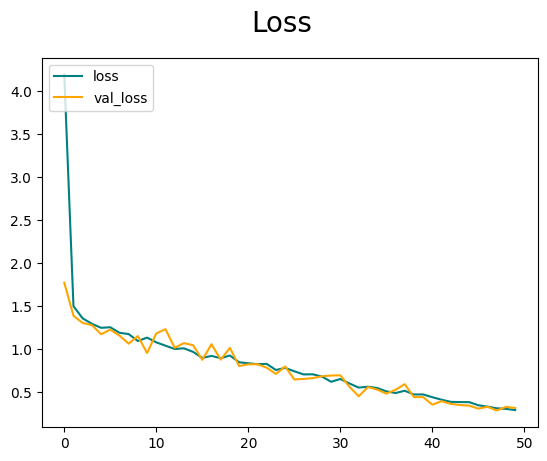

In [100]:
fig = plt.figure()
plt.plot(model.history['loss'], color='teal', label='loss')
plt.plot(model.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

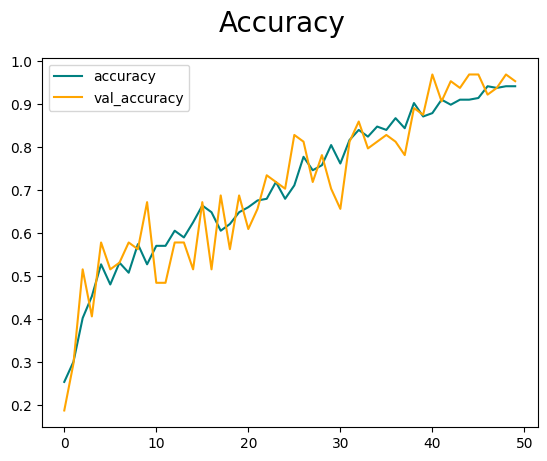

In [101]:
fig = plt.figure()
plt.plot(model.history['accuracy'], color='teal', label='accuracy')
plt.plot(model.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [146]:
from tensorflow.keras.models import load_model
pet_model.save(os.path.join(data_path,'petemotion_classifier.h5'))

In [150]:
ytest = []
ypred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    ytest.append(y)
    yhat = pet_model.predict(X)
    ypred.append(yhat)

1/1 [==============================] - 0s 52ms/step


In [151]:
ytest

[array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]], dtype=float32)]

In [152]:
ypred

[array([[1.8719408e-01, 7.3212743e-01, 5.4600455e-02, 2.6078014e-02],
        [2.2495026e-02, 2.6328573e-02, 3.1811070e-02, 9.1936541e-01],
        [3.3024120e-01, 5.8612508e-01, 4.1918375e-02, 4.1715343e-02],
        [2.0883751e-01, 2.8371725e-02, 3.1865600e-01, 4.4413468e-01],
        [5.1159393e-03, 2.4916843e-02, 3.9086058e-03, 9.6605855e-01],
        [1.0714043e-02, 1.6863506e-03, 9.1348493e-01, 7.4114680e-02],
        [9.5698732e-01, 9.0534333e-03, 2.9151913e-02, 4.8074150e-03],
        [8.4141213e-01, 8.8078983e-02, 6.4739816e-02, 5.7690786e-03],
        [8.1744975e-01, 6.3841477e-02, 1.1089614e-01, 7.8126891e-03],
        [6.0345354e-03, 2.5719250e-04, 9.8879683e-01, 4.9114120e-03],
        [7.4331753e-02, 4.3230096e-01, 3.4414303e-02, 4.5895299e-01],
        [1.3559939e-02, 5.1565465e-02, 8.4274220e-01, 9.2132293e-02],
        [1.0846424e-02, 7.3452117e-03, 9.0691662e-01, 7.4891761e-02],
        [8.8515151e-01, 3.4879319e-02, 4.7258448e-02, 3.2710839e-02],
        [8.8867569e-

In [161]:
predicted_class_indices = np.argmax(ypred[0], axis=1)

In [162]:
true_class_indices = np.argmax(ytest[0], axis=1)

In [168]:
true_class_indices

array([1, 3, 1, 0, 3, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 1, 0, 2, 0, 3, 2])

In [171]:
for i in range(len(true_class_indices)):
  print(f'predicted : {class_names[predicted_class_indices[i]]} - {class_names[true_class_indices[i]]} : Actual ')

predicted : Other - Other : Actual 
predicted : happy - happy : Actual 
predicted : Other - Other : Actual 
predicted : happy - Angry : Actual 
predicted : happy - happy : Actual 
predicted : Sad - Sad : Actual 
predicted : Angry - Angry : Actual 
predicted : Angry - Angry : Actual 
predicted : Angry - Angry : Actual 
predicted : Sad - Sad : Actual 
predicted : happy - Other : Actual 
predicted : Sad - Sad : Actual 
predicted : Sad - Sad : Actual 
predicted : Angry - Angry : Actual 
predicted : Angry - Angry : Actual 
predicted : Angry - Angry : Actual 
predicted : Sad - Sad : Actual 
predicted : Angry - Angry : Actual 
predicted : Sad - Sad : Actual 
predicted : Sad - Sad : Actual 
predicted : Sad - Sad : Actual 
predicted : Sad - Sad : Actual 
predicted : Sad - Sad : Actual 
predicted : Sad - Sad : Actual 
predicted : happy - happy : Actual 
predicted : Sad - Sad : Actual 
predicted : Other - Other : Actual 
predicted : Angry - Angry : Actual 
predicted : Sad - Sad : Actual 
predicte